# Toy NN
### A minimal python NN library for multilayer neural nets.
There's a lot of these out there doing this with numpy in 11 lines of code or so; but I wanted this to be:
- easily extendable, so had to be at least a little object oriented
- multilayer; most of the minimal example have one or two hardcoded layers
- have customizable loss and activation functions. 

In the end this has 43 lines of codes, so I would argue it's still pretty minimal :)


## Usage
We're going to try to learn the classic `XOR` function using a couple of layers. Very similar to the scikit-learn example seen [here](http://scikit-learn.org/stable/auto_examples/svm/plot_svm_nonlinear.html)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)
from toynn import NN, sigmoid, mse, train_test
%matplotlib inline

In [2]:
n_data = 500
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                    np.linspace(-3, 3, 500))
X = np.random.randn(n_data, 2)

We drew `X` at random, now we label the points according to the `XOR` rule:

In [3]:
Y = np.logical_xor(X[:, 0] > np.random.randn(n_data)/3,
                   X[:, 1] > np.random.randn(n_data)/3)

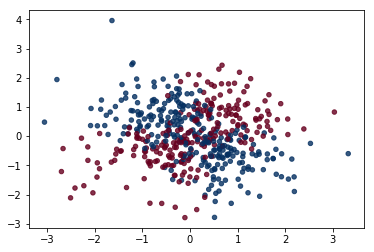

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='RdBu', s=20, alpha=.8);

Now we create our model and fit to data; we will use a three layer network with 20 hidden neurons for each. Note that the input dimension is two (a point in 2D space) and that the output dimension is one (true or false).

In [ ]:
model = NN(layers=[(2, 20), (20, 20),  (20, 1)],
          activation=sigmoid,
          loss=mse)

In [ ]:
plt.scatter(Y,target)

In [ ]:
target = .9 * model.predict(X).ravel() + .1 * Y

In [ ]:
model.train(X, target, learning_rate = 1, n_train=5000, batch_size=32);

Allright, pretty good training loss, let's vizualize the results:

In [95]:
yhat = model.predict(np.c_[xx.ravel(), yy.ravel()])
yhat = yhat.reshape(xx.shape)

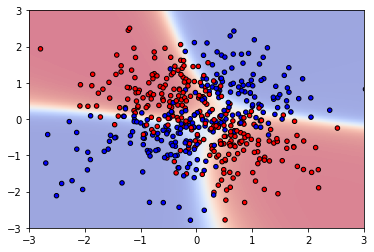

In [96]:
plt.imshow(yhat, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap='coolwarm', alpha=0.5);

plt.scatter(X[:, 0], X[:, 1], c=Y,
            edgecolors='k', cmap='bwr',s=20);
plt.axis([-3,3,-3,3]);

The data is in the scatter plot, and our predictions for all plots in the grid are the background colors: we managed to learn the XOR rule!

In [ ]:
model = NN(layers=[(2, 20), (20, 20),  (20, 1)],
          activation=sigmoid,
          loss=mse)

In [97]:
loss_arrs = []
test_arrs = []
np.random.seed(1)
for _ in range(10):
    model = NN(layers=[(2, 20), (20, 20),(20, 10), (10, 10),   (10, 1)],
              activation=sigmoid,
              loss=mse)
    losses, test_losses = train_test(model, X, Y,
                                     train_pct=.5,
                                     learning_rate=0.3,
                                     epochs=800, batch_size=16, 
                                    rescale_target=True, 
                                    rescaling_rate=.001)
    loss_arrs.append(losses)
    test_arrs.append(test_losses)

In [98]:
loss_arrs=np.array(loss_arrs)
test_arrs=np.array(test_arrs)
print('loss: {}, stdev: {}'.format(np.mean(loss_arrs[:, -1]),
                                    np.std(loss_arrs[:, -1])))
                                                
print('test loss: {}, stdev: {}'.format(np.mean(test_arrs[:, -1]),
                                        np.std(test_arrs[:, -1])))

loss: 0.09877128409302827, stdev: 0.0019282117315241815
test loss: 0.1614647350550302, stdev: 0.0022522286670170395


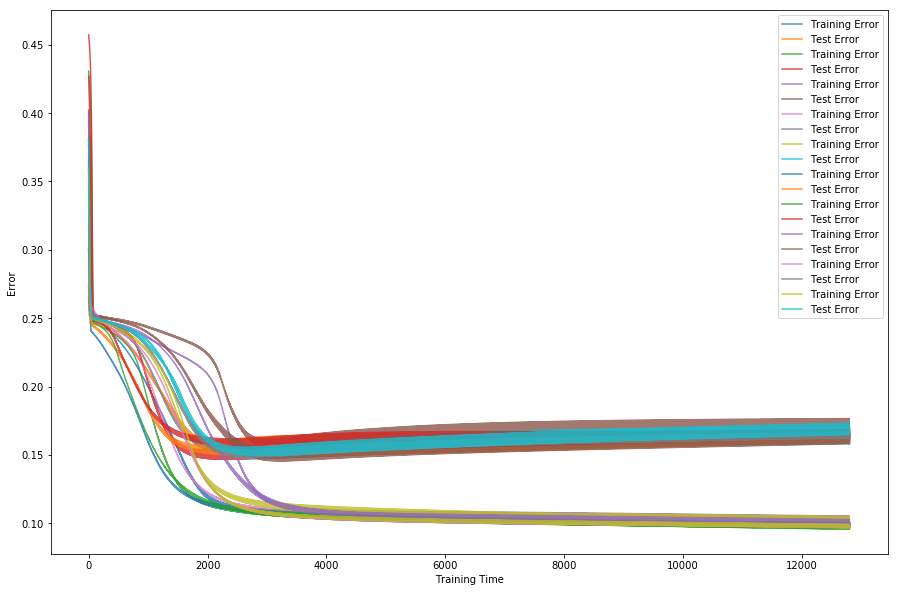

In [99]:
plt.figure(figsize=(15,10))
maxi = 80000
for l, t in zip(loss_arrs, test_arrs):
    plt.plot(l[:maxi], label='Training Error', alpha=.8)
    plt.plot(t[:maxi], label='Test Error', alpha=.8)
plt.legend()
plt.xlabel('Training Time')
plt.ylabel('Error')

In [ ]:
yhat = model.predict(X)

In [ ]:
err = yhat - Y.reshape(-1, 1)
err = err.ravel()

In [ ]:
plt.scatter(err, np.multiply(err, err))

In [ ]:
plt.hist(err, bins=200);

In [ ]:

yhat = model.predict(X)
err = yhat - Y.reshape(-1, 1)
err = err.ravel()
plt.scatter(err, np.multiply(err, err))

In [ ]:
ans = plt.hist(err, bins=200)


In [ ]:
counts = ans[0]
vals = ans[1]

In [ ]:
T=.001
plt.plot(vals, np.exp(-vals**2/T)/np.sum(np.exp(-vals**2/T)))
plt.scatter(vals[1:], counts/300)

In [ ]:
import scipy.signal as ss
import scipy.interpolate as si

In [ ]:
cs = si.CubicSpline(vals[1:], counts)

In [ ]:
plt.scatter(vals[1:] , counts, alpha=.5)
plt.plot(vals[1:] , cs(vals[1:]))

In [ ]:
sg = ss.savgol_filter(counts, 51, 2)

In [ ]:
plt.plot(sg)

In [ ]:
from statsmodels.nonparametric.smoothers_lowess import lowess

In [ ]:
fit = lowess(counts, vals[1:], frac=0.08, it=10)

In [ ]:
plt.plot(fit[:, 0], fit[:, 1])

In [ ]:
lowess?